# MACHINE LEARNING LEAGUE OF LEGENDS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df1 = pd.read_csv("america.csv")
df2 = pd.read_csv("europa.csv")
df3 = pd.read_csv("asia.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)
df

,endOfGameResult,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,gameVersion,matchId,platformId,region,team_100_EPIC_MONSTER_KILL,...,team_200_horde_first,team_200_horde_kills,team_200_inhibitor_first,team_200_inhibitor_kills,team_200_riftHerald_first,team_200_riftHerald_kills,team_200_tower_first,team_200_tower_kills,tournamentCode,winner_team_id
0,GameComplete,1400,1745018960446,5269865992,1745017559681,15.8.675.10,NA1_5269865992,NA1,americas,3.0,...,False,0,False,0,False,0,False,2,NaN,100
1,GameComplete,1524,1744589457829,5266494442,1744587933314,15.7.672.4034,NA1_5266494442,NA1,americas,2.0,...,True,5,True,1,False,0,False,8,NaN,200
2,GameComplete,1782,1744585171830,5266444763,1744583389986,15.7.672.4034,NA1_5266444763,NA1,americas,2.0,...,True,1,False,0,False,0,False,2,NaN,100
3,GameComplete,1939,1744582474913,5266408515,1744580535842,15.7.672.4034,NA1_5266408515,NA1,americas,1001.0,...,False,3,True,1,False,0,False,8,NaN,200
4,GameComplete,930,1744576222010,5266355238,1744575291787,15.7.672.4034,NA1_5266355238,NA1,americas,1.0,...,False,0,False,0,False,0,True,3,NaN,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,GameComplete,2039,1742228942521,7564400504,1742226903630,15.5.662.6652,KR_7564400504,KR,asia,2.0,...,True,6,False,0,True,1,True,4,NaN,100
9998,GameComplete,1768,1742225867891,7564345758,1742224099619,15.5.662.6652,KR_7564345758,KR,asia,1001.0,...,True,6,True,1,True,1,True,7,NaN,200
9999,GameComplete,1153,1742214911949,7564082053,1742213758406,15.5.662.6652,KR_7564082053,KR,asia,3.0,...,False,0,False,0,False,0,False,0,NaN,100
10000,GameComplete,1264,1741530850044,7555030815,1741529585699,15.5.662.6652,KR_7555030815,KR,asia,3.0,...,True,4,False,0,False,0,False,1,NaN,100


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10001
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   endOfGameResult             9999 non-null   object 
 1   gameDuration                9999 non-null   int64  
 2   gameEndTimestamp            9999 non-null   int64  
 3   gameId                      9999 non-null   int64  
 4   gameStartTimestamp          9999 non-null   int64  
 5   gameVersion                 9999 non-null   object 
 6   matchId                     9999 non-null   object 
 7   platformId                  9999 non-null   object 
 8   region                      9999 non-null   object 
 9   team_100_EPIC_MONSTER_KILL  9999 non-null   float64
 10  team_100_FIRST_BLOOD        9999 non-null   float64
 11  team_100_FIRST_TURRET       9999 non-null   float64
 12  team_100_atakhan_first      9999 non-null   bool   
 13  team_100_atakhan_kills      9999 non-

In [31]:
df = df.drop(columns=['tournamentCode'])

In [33]:
df = df.dropna()

In [38]:
df['team_100_FIRST_BLOOD'].value_counts()

team_100_FIRST_BLOOD
3.0       5146
1001.0    4753
0.0         85
1.0         12
2.0          3
Name: count, dtype: int64

In [39]:
df['team_200_FIRST_BLOOD'].value_counts()

team_200_FIRST_BLOOD
1001.0    5146
3.0       4753
0.0         87
1.0         12
2.0          1
Name: count, dtype: int64

In [41]:
df['team_100_dragon_first'].value_counts()
#False Equipo 200(rojo), #True Equipo 100(azul)

team_100_dragon_first
False    6276
True     3723
Name: count, dtype: int64

In [43]:
df["equipo_dragon_prim"] = df["team_100_dragon_first"].map({True: 0, False: 1})

In [44]:
df['equipo_dragon_prim']

0        1
1        0
2        0
3        1
4        1
        ..
9997     0
9998     1
9999     1
10000    0
10001    1
Name: equipo_dragon_prim, Length: 9999, dtype: int64

In [49]:
df = df.drop(columns=['team_100_dragon_first','team_200_dragon_first','team_100_dragon_kills','team_200_dragon_kills'],axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10001
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   endOfGameResult             9999 non-null   object 
 1   gameDuration                9999 non-null   int64  
 2   gameEndTimestamp            9999 non-null   int64  
 3   gameId                      9999 non-null   int64  
 4   gameStartTimestamp          9999 non-null   int64  
 5   gameVersion                 9999 non-null   object 
 6   matchId                     9999 non-null   object 
 7   platformId                  9999 non-null   object 
 8   region                      9999 non-null   object 
 9   team_100_EPIC_MONSTER_KILL  9999 non-null   float64
 10  team_100_FIRST_BLOOD        9999 non-null   float64
 11  team_100_FIRST_TURRET       9999 non-null   float64
 12  team_100_atakhan_first      9999 non-null   bool   
 13  team_100_atakhan_kills      9999 non-

In [54]:
df['team_100_horde_first'].value_counts()
#False Equipo 200(rojo), #True Equipo 100(azul)

team_100_horde_first
True     5892
False    4107
Name: count, dtype: int64

In [55]:
df["equipo_horda_prim"] = df["team_100_horde_first"].map({True: 0, False: 1})

In [76]:
df = df.drop(columns=['team_100_horde_first','team_200_horde_first'],axis=1)

KeyError: "['team_100_horde_first', 'team_200_horde_first'] not found in axis"

In [67]:
df['team_100_champion_first'].value_counts()
#False Equipo 200(rojo), #True Equipo 100(azul)

team_100_champion_first
True     5083
False    4916
Name: count, dtype: int64

In [68]:
df["equipo_kill_prim"] = df["team_100_champion_first"].map({True: 0, False: 1})

In [70]:
df = df.drop(columns=['team_100_champion_first','team_200_champion_first','team_100_FIRST_BLOOD','team_200_FIRST_BLOOD'],axis=1)

In [71]:
df

,endOfGameResult,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,gameVersion,matchId,platformId,region,team_100_EPIC_MONSTER_KILL,...,team_200_inhibitor_first,team_200_inhibitor_kills,team_200_riftHerald_first,team_200_riftHerald_kills,team_200_tower_first,team_200_tower_kills,winner_team_id,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim
0,GameComplete,1400,1745018960446,5269865992,1745017559681,15.8.675.10,NA1_5269865992,NA1,americas,3.0,...,False,0,False,0,False,2,100,1,0,1
1,GameComplete,1524,1744589457829,5266494442,1744587933314,15.7.672.4034,NA1_5266494442,NA1,americas,2.0,...,True,1,False,0,False,8,200,0,1,0
2,GameComplete,1782,1744585171830,5266444763,1744583389986,15.7.672.4034,NA1_5266444763,NA1,americas,2.0,...,False,0,False,0,False,2,100,0,1,1
3,GameComplete,1939,1744582474913,5266408515,1744580535842,15.7.672.4034,NA1_5266408515,NA1,americas,1001.0,...,True,1,False,0,False,8,200,1,0,1
4,GameComplete,930,1744576222010,5266355238,1744575291787,15.7.672.4034,NA1_5266355238,NA1,americas,1.0,...,False,0,False,0,True,3,200,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,GameComplete,2039,1742228942521,7564400504,1742226903630,15.5.662.6652,KR_7564400504,KR,asia,2.0,...,False,0,True,1,True,4,100,0,1,1
9998,GameComplete,1768,1742225867891,7564345758,1742224099619,15.5.662.6652,KR_7564345758,KR,asia,1001.0,...,True,1,True,1,True,7,200,1,1,0
9999,GameComplete,1153,1742214911949,7564082053,1742213758406,15.5.662.6652,KR_7564082053,KR,asia,3.0,...,False,0,False,0,False,0,100,1,0,0
10000,GameComplete,1264,1741530850044,7555030815,1741529585699,15.5.662.6652,KR_7555030815,KR,asia,3.0,...,False,0,False,0,False,1,100,0,1,1


In [72]:
df = df.drop(columns=['endOfGameResult','gameEndTimestamp','gameId','gameStartTimestamp','matchId'])

In [73]:
df

,gameDuration,gameVersion,platformId,region,team_100_EPIC_MONSTER_KILL,team_100_FIRST_TURRET,team_100_atakhan_first,team_100_atakhan_kills,team_100_baron_first,team_100_baron_kills,...,team_200_inhibitor_first,team_200_inhibitor_kills,team_200_riftHerald_first,team_200_riftHerald_kills,team_200_tower_first,team_200_tower_kills,winner_team_id,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim
0,1400,15.8.675.10,NA1,americas,3.0,1.0,True,1,False,0,...,False,0,False,0,False,2,100,1,0,1
1,1524,15.7.672.4034,NA1,americas,2.0,1.0,True,1,False,0,...,True,1,False,0,False,8,200,0,1,0
2,1782,15.7.672.4034,NA1,americas,2.0,1.0,True,1,True,1,...,False,0,False,0,False,2,100,0,1,1
3,1939,15.7.672.4034,NA1,americas,1001.0,1.0,False,0,True,1,...,True,1,False,0,False,8,200,1,0,1
4,930,15.7.672.4034,NA1,americas,1.0,1001.0,False,0,False,0,...,False,0,False,0,True,3,200,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,2039,15.5.662.6652,KR,asia,2.0,1001.0,True,1,False,0,...,False,0,True,1,True,4,100,0,1,1
9998,1768,15.5.662.6652,KR,asia,1001.0,0.0,False,0,False,0,...,True,1,True,1,True,7,200,1,1,0
9999,1153,15.5.662.6652,KR,asia,3.0,1.0,False,0,False,0,...,False,0,False,0,False,0,100,1,0,0
10000,1264,15.5.662.6652,KR,asia,3.0,1.0,True,1,False,0,...,False,0,False,0,False,1,100,0,1,1


In [ ]:
df['winner_team_id'].value_counts()

In [13]:
df = df.drop(columns = 'tournamentCode')

In [14]:
df = df.drop(columns = 'endOfGameResult')

<Axes: >

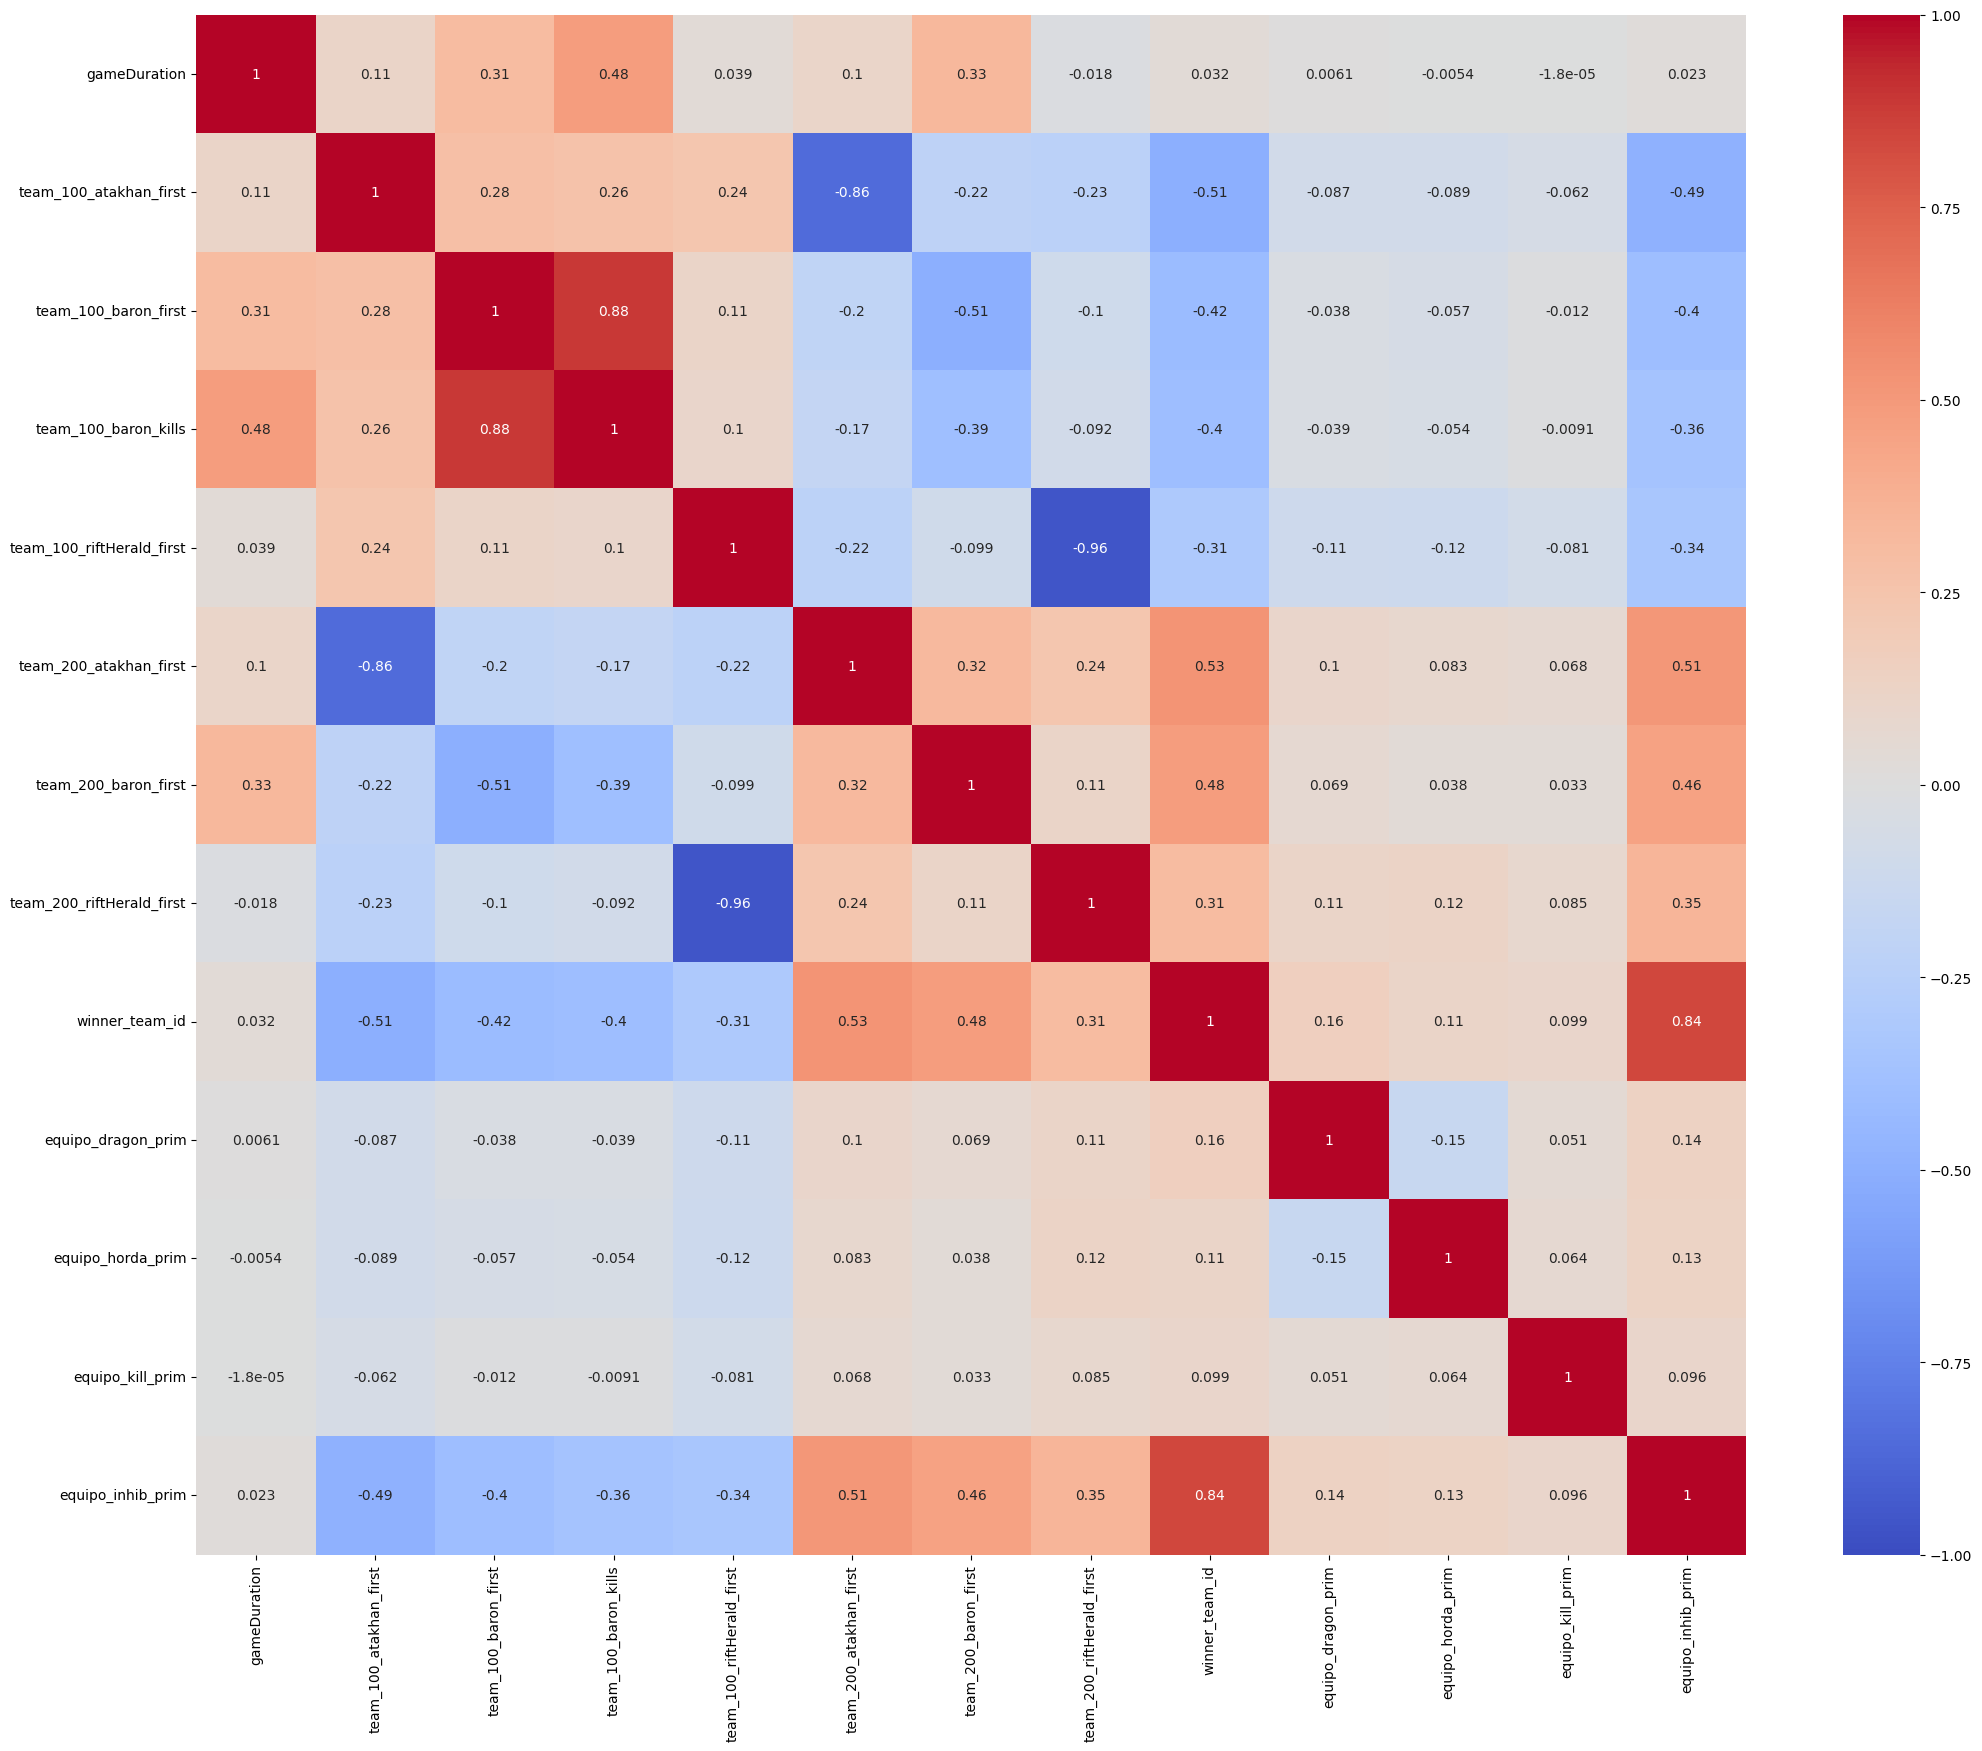

In [106]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [85]:
df['team_100_inhibitor_first'].value_counts()
#False Equipo 200(rojo), #True Equipo 100(azul)

team_100_inhibitor_first
True     3634
False    3368
Name: count, dtype: int64

In [86]:
df['team_200_inhibitor_first'].value_counts()


team_200_inhibitor_first
False    3634
True     3368
Name: count, dtype: int64

In [83]:
torretas = df['team_200_inhibitor_first'] == df['team_100_inhibitor_first']
df = df[~torretas]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 1 to 10001
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameDuration                7002 non-null   int64  
 1   gameVersion                 7002 non-null   object 
 2   platformId                  7002 non-null   object 
 3   region                      7002 non-null   object 
 4   team_100_EPIC_MONSTER_KILL  7002 non-null   float64
 5   team_100_FIRST_TURRET       7002 non-null   float64
 6   team_100_atakhan_first      7002 non-null   bool   
 7   team_100_atakhan_kills      7002 non-null   int64  
 8   team_100_baron_first        7002 non-null   bool   
 9   team_100_baron_kills        7002 non-null   int64  
 10  team_100_champion_kills     7002 non-null   int64  
 11  team_100_horde_kills        7002 non-null   int64  
 12  team_100_inhibitor_first    7002 non-null   bool   
 13  team_100_inhibitor_kills    7002 non-

In [87]:
df["equipo_inhib_prim"] = df["team_100_inhibitor_first"].map({True: 0, False: 1})

C:\Users\david\AppData\Local\Temp\ipykernel_12424\3809122541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["equipo_inhib_prim"] = df["team_100_inhibitor_first"].map({True: 0, False: 1})


In [88]:
df

,gameDuration,gameVersion,platformId,region,team_100_EPIC_MONSTER_KILL,team_100_FIRST_TURRET,team_100_atakhan_first,team_100_atakhan_kills,team_100_baron_first,team_100_baron_kills,...,team_200_inhibitor_kills,team_200_riftHerald_first,team_200_riftHerald_kills,team_200_tower_first,team_200_tower_kills,winner_team_id,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim,equipo_inhib_prim
1,1524,15.7.672.4034,NA1,americas,2.0,1.0,True,1,False,0,...,1,False,0,False,8,200,0,1,0,1
3,1939,15.7.672.4034,NA1,americas,1001.0,1.0,False,0,True,1,...,1,False,0,False,8,200,1,0,1,1
5,1911,15.7.672.4034,NA1,americas,1001.0,1.0,True,1,True,1,...,0,True,1,False,5,100,1,1,1,0
6,1691,15.7.672.4034,NA1,americas,1.0,1.0,True,1,False,0,...,0,False,0,False,4,100,1,0,0,0
7,1580,15.7.672.4034,NA1,americas,3.0,0.0,False,0,False,0,...,1,True,1,True,7,200,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1735,15.6.666.5757,KR,asia,1.0,1.0,True,1,True,1,...,0,False,0,False,3,100,0,1,0,0
9995,1769,15.5.662.6652,KR,asia,3.0,1.0,True,1,True,1,...,0,False,0,False,4,100,0,1,0,0
9997,2039,15.5.662.6652,KR,asia,2.0,1001.0,True,1,False,0,...,0,True,1,True,4,100,0,1,1,0
9998,1768,15.5.662.6652,KR,asia,1001.0,0.0,False,0,False,0,...,1,True,1,True,7,200,1,1,0,1


In [90]:
df = df.drop(columns=['team_100_FIRST_TURRET','team_200_FIRST_TURRET','team_200_inhibitor_kills','team_100_inhibitor_kills','team_200_tower_first','team_100_tower_first'],axis=1)

In [93]:
df = df.drop(columns=['team_100_champion_kills','team_200_horde_kills','team_200_inhibitor_first','team_200_champion_kills','team_200_tower_kills','team_200_riftHerald_kills'])

In [109]:
df

,gameDuration,team_100_atakhan_first,team_100_baron_first,team_100_riftHerald_first,team_200_atakhan_first,team_200_baron_first,team_200_riftHerald_first,winner_team_id,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim,equipo_inhib_prim
1,1524,True,False,True,False,False,False,200,0,1,0,1
3,1939,False,True,True,True,False,False,200,1,0,1,1
5,1911,True,True,False,False,False,True,100,1,1,1,0
6,1691,True,False,True,False,False,False,100,1,0,0,0
7,1580,False,False,False,True,False,True,200,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1735,True,True,True,False,False,False,100,0,1,0,0
9995,1769,True,True,True,False,False,False,100,0,1,0,0
9997,2039,True,False,False,False,True,True,100,0,1,1,0
9998,1768,False,False,False,True,True,True,200,1,1,0,1


In [95]:
df = df.drop(columns=['team_100_EPIC_MONSTER_KILL','team_100_horde_kills','team_200_baron_kills'])

In [97]:
df = df.drop(columns=['gameVersion','platformId','team_200_EPIC_MONSTER_KILL'])

In [99]:
df = df.drop(columns=['team_100_tower_kills','team_100_riftHerald_kills'])

In [102]:
df = df.drop(columns=['team_100_inhibitor_first','region'])

In [105]:
df = df.drop(columns=['team_100_atakhan_kills','team_200_atakhan_kills'])

In [108]:
df = df.drop(columns=['team_100_baron_kills'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6853 entries, 1 to 10001
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   gameDuration               6853 non-null   int64
 1   team_100_atakhan_first     6853 non-null   bool 
 2   team_100_baron_first       6853 non-null   bool 
 3   team_100_riftHerald_first  6853 non-null   bool 
 4   team_200_atakhan_first     6853 non-null   bool 
 5   team_200_baron_first       6853 non-null   bool 
 6   team_200_riftHerald_first  6853 non-null   bool 
 7   winner_team_id             6853 non-null   int64
 8   equipo_dragon_prim         6853 non-null   int64
 9   equipo_horda_prim          6853 non-null   int64
 10  equipo_kill_prim           6853 non-null   int64
 11  equipo_inhib_prim          6853 non-null   int64
dtypes: bool(6), int64(6)
memory usage: 414.9 KB


In [111]:
(df['team_100_riftHerald_first'] == df['team_200_riftHerald_first']).value_counts()

False    6853
True      149
Name: count, dtype: int64

In [112]:
herald = df['team_100_riftHerald_first'] == df['team_200_riftHerald_first']
df = df[~herald]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6853 entries, 1 to 10001
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   gameDuration               6853 non-null   int64
 1   team_100_atakhan_first     6853 non-null   bool 
 2   team_100_baron_first       6853 non-null   bool 
 3   team_100_riftHerald_first  6853 non-null   bool 
 4   team_200_atakhan_first     6853 non-null   bool 
 5   team_200_baron_first       6853 non-null   bool 
 6   team_200_riftHerald_first  6853 non-null   bool 
 7   winner_team_id             6853 non-null   int64
 8   equipo_dragon_prim         6853 non-null   int64
 9   equipo_horda_prim          6853 non-null   int64
 10  equipo_kill_prim           6853 non-null   int64
 11  equipo_inhib_prim          6853 non-null   int64
dtypes: bool(6), int64(6)
memory usage: 414.9 KB


In [115]:
df['team_100_riftHerald_first'].value_counts()
#False Equipo 200(rojo), #True Equipo 100(azul)

team_100_riftHerald_first
True     4150
False    2703
Name: count, dtype: int64

In [116]:
df['team_200_riftHerald_first'].value_counts()


team_200_riftHerald_first
False    4150
True     2703
Name: count, dtype: int64

In [118]:
df["equipo_heraldo_prim"] = df["team_100_riftHerald_first"].map({True: 0, False: 1})

C:\Users\david\AppData\Local\Temp\ipykernel_12424\4055395878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["equipo_heraldo_prim"] = df["team_100_riftHerald_first"].map({True: 0, False: 1})


In [131]:
df = df.drop(columns =['team_100_riftHerald_first','team_200_riftHerald_first'])

In [ ]:
df = df.rename(columns={'team_100_atakhan_first':'equipo_0_atakhan_prim'})

In [127]:
df = df.rename(columns={'team_100_baron_first':'equipo_0_baron_prim'})
df = df.rename(columns={'team_200_atakhan_first':'equipo_1_atakhan_prim'})
df = df.rename(columns={'team_200_baron_first':'equipo_1_baron_prim'})

In [137]:
df = df.rename(columns={'gameDuration':'duracion_partida'})
df = df.rename(columns={'winner_team_id':'equipo_ganador'})


In [139]:
df["equipo_ganador"] = df["equipo_ganador"].map({100: 0, 200: 1})

In [140]:
df

,duracion_partida,equipo_0_atakhan_prim,equipo_0_baron_prim,equipo_1_atakhan_prim,equipo_1_baron_prim,equipo_ganador,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim,equipo_inhib_prim,equipo_heraldo_prim
1,1524,True,False,False,False,1,0,1,0,1,0
3,1939,False,True,True,False,1,1,0,1,1,0
5,1911,True,True,False,False,0,1,1,1,0,1
6,1691,True,False,False,False,0,1,0,0,0,0
7,1580,False,False,True,False,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9989,1735,True,True,False,False,0,0,1,0,0,0
9995,1769,True,True,False,False,0,0,1,0,0,0
9997,2039,True,False,False,True,0,0,1,1,0,1
9998,1768,False,False,True,True,1,1,1,0,1,1


In [141]:
col = df.pop("equipo_ganador")
df["equipo_ganador"] = col

<Axes: >

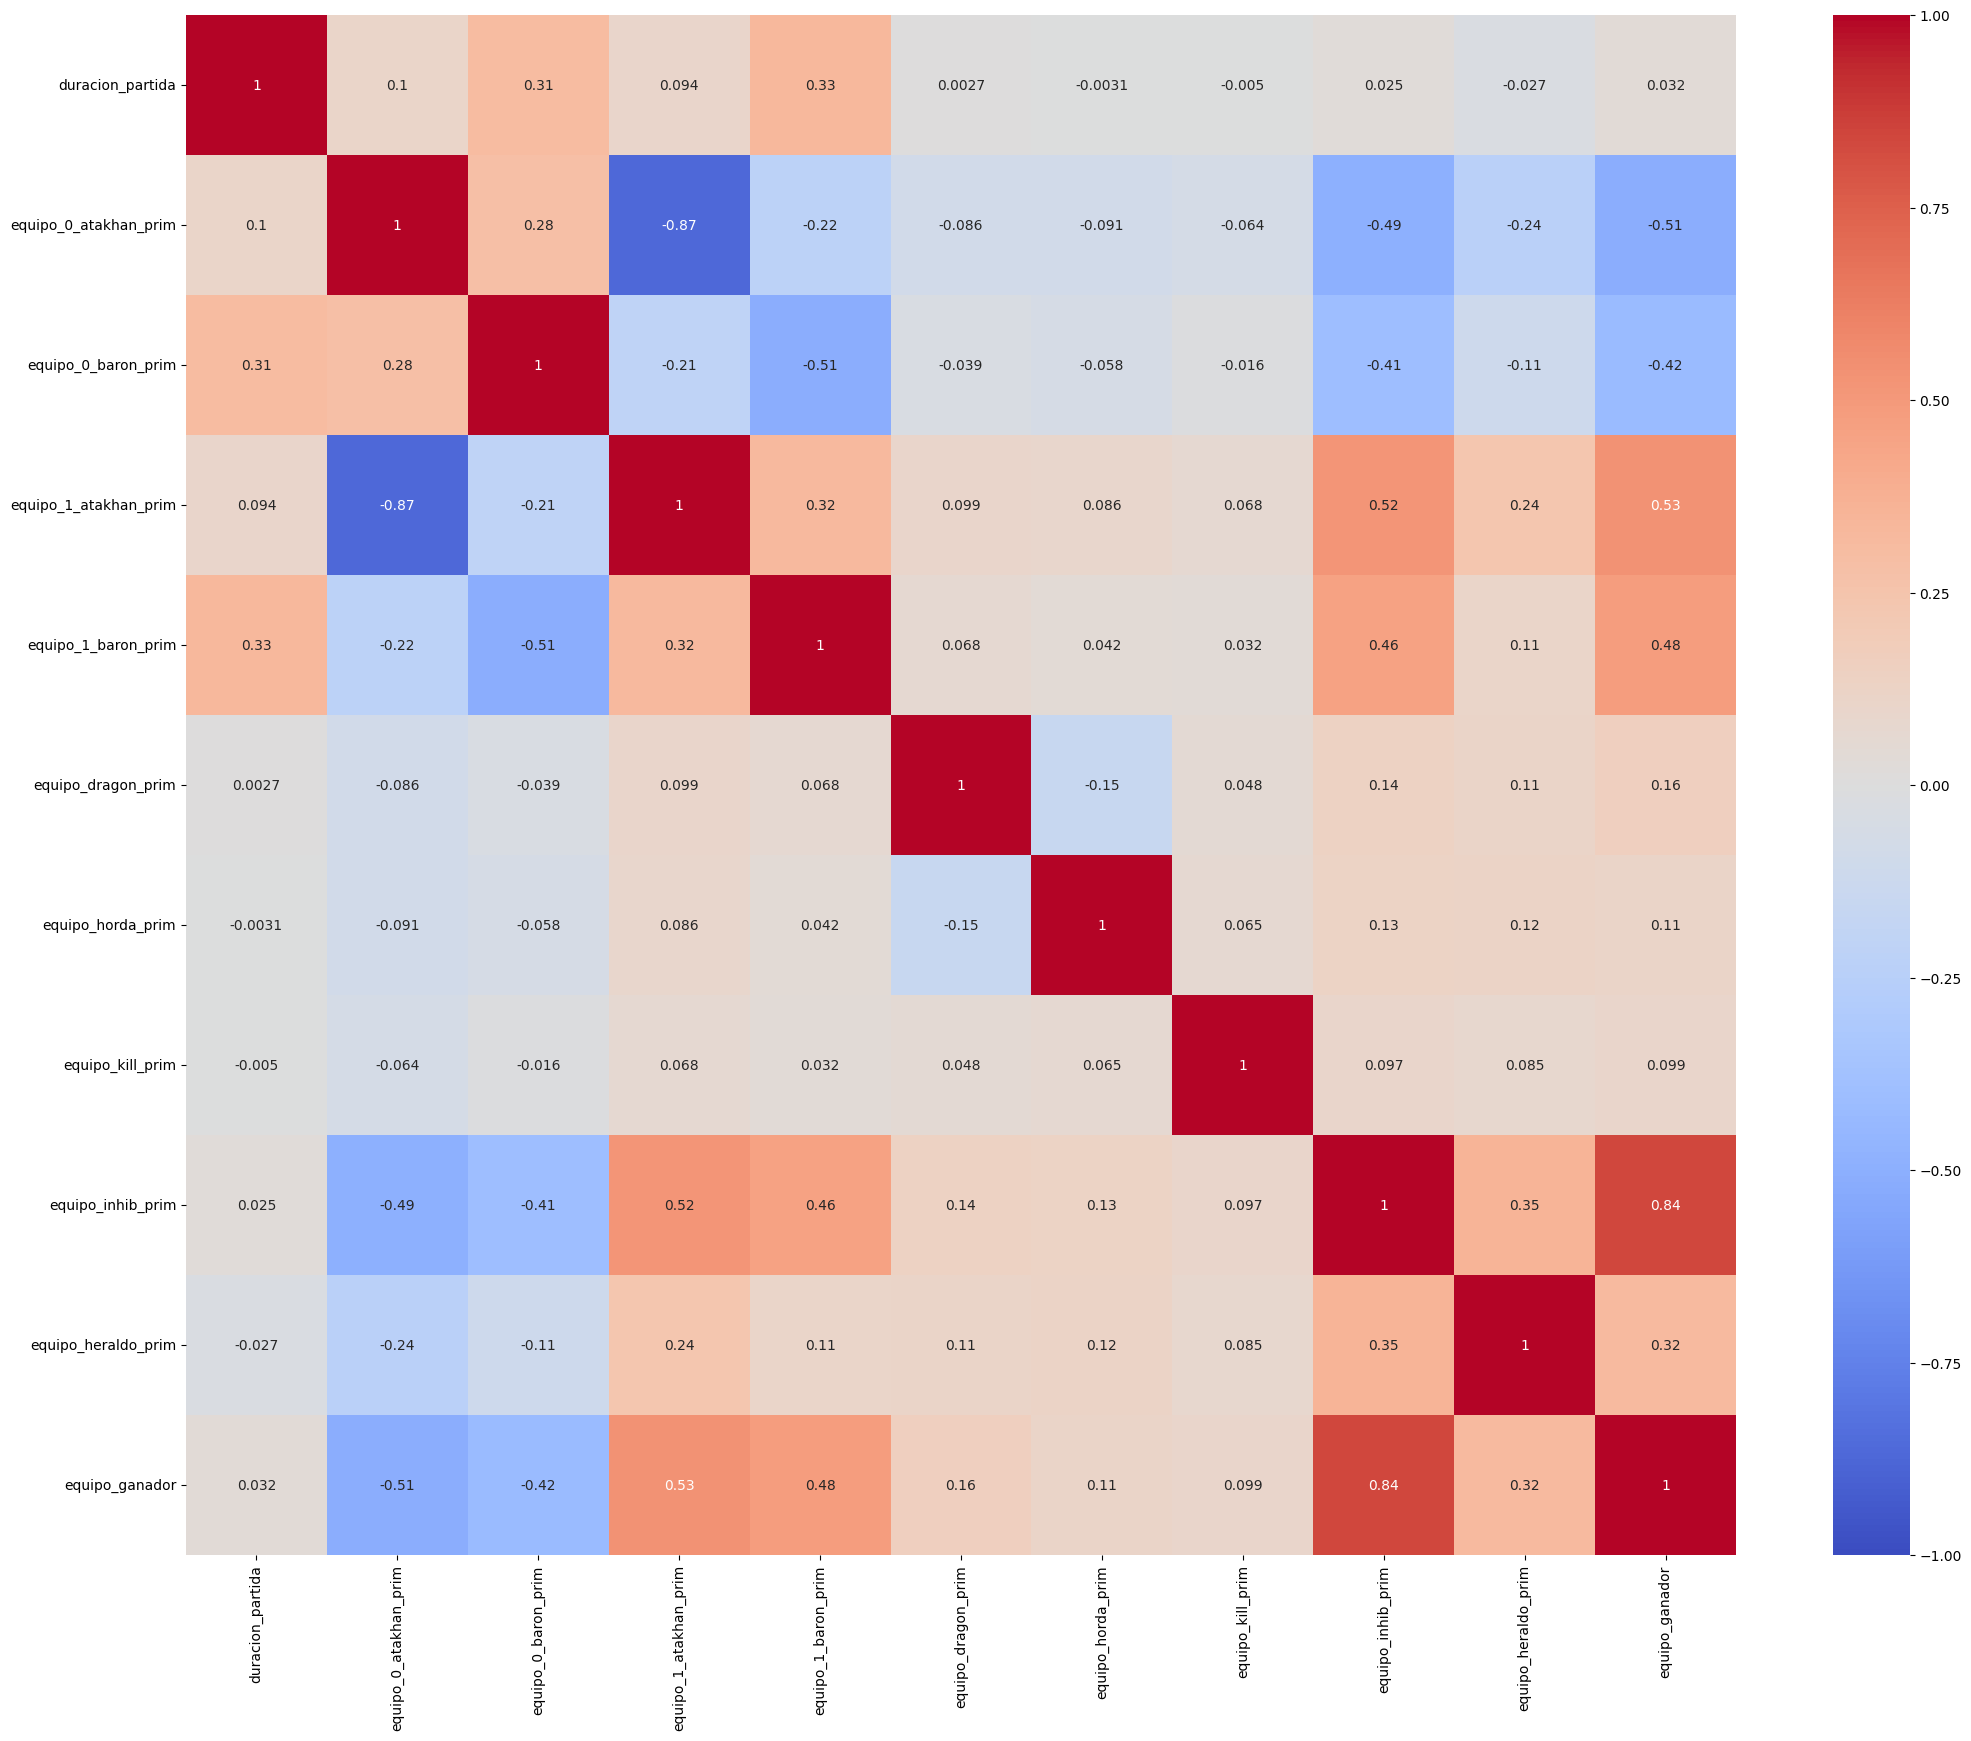

In [142]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [143]:
df

,duracion_partida,equipo_0_atakhan_prim,equipo_0_baron_prim,equipo_1_atakhan_prim,equipo_1_baron_prim,equipo_dragon_prim,equipo_horda_prim,equipo_kill_prim,equipo_inhib_prim,equipo_heraldo_prim,equipo_ganador
1,1524,True,False,False,False,0,1,0,1,0,1
3,1939,False,True,True,False,1,0,1,1,0,1
5,1911,True,True,False,False,1,1,1,0,1,0
6,1691,True,False,False,False,1,0,0,0,0,0
7,1580,False,False,True,False,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9989,1735,True,True,False,False,0,1,0,0,0,0
9995,1769,True,True,False,False,0,1,0,0,0,0
9997,2039,True,False,False,True,0,1,1,0,1,0
9998,1768,False,False,True,True,1,1,0,1,1,1


In [144]:
df.to_csv('datoslimpios.csv',index=False)